In [ ]:
import pandas as pd
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('store.csv')
df = pd.merge(df1, df2, left_on='Store', right_on='Store', how='left')

# Chcemy jeszcze wymieszać kolejność
df = df.sample(len(df))
df

/tmp/ipykernel_3921/1062901942.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
358960,114,5,2014-08-22,5162,605,1,1,0,1,c,a,4510.0,NaN,NaN,1,48.0,2011.0,"Mar,Jun,Sept,Dec"
887174,420,6,2013-04-27,4847,430,1,0,0,0,d,c,250.0,NaN,NaN,1,27.0,2012.0,"Jan,Apr,Jul,Oct"
435743,564,5,2014-06-06,6971,588,1,1,0,0,d,c,6540.0,NaN,NaN,1,14.0,2013.0,"Jan,Apr,Jul,Oct"
789338,704,3,2013-07-24,7445,811,1,0,0,1,d,c,1910.0,4.0,2009.0,0,NaN,NaN,NaN
420599,1030,5,2014-06-20,4331,381,1,1,0,0,a,a,36410.0,4.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734186,187,3,2013-09-11,6338,769,1,1,0,0,a,c,19360.0,NaN,NaN,0,NaN,NaN,NaN
733519,635,4,2013-09-12,6888,698,1,1,0,0,a,a,27530.0,4.0,2014.0,0,NaN,NaN,NaN
1011044,525,7,2013-01-06,0,0,0,0,0,0,d,c,1870.0,9.0,2013.0,0,NaN,NaN,NaN
976543,589,3,2013-02-06,1808,281,1,1,0,0,a,c,360.0,NaN,NaN,1,18.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
# Główna rzecz jaką chcielibyśmy zmienić to jakoś skonwertować rzeczy, które nie są oczywiste numerycznie
# Takie rzeczy to DayOfWeek, StateHoliday
# 1 podejściem będzie one-hot-encoding
df = pd.get_dummies(df, columns=['DayOfWeek','StateHoliday', 'StoreType', "Assortment"])
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(100000)
df.columns

Index(['Store', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'StateHoliday_0', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [ ]:
# Dzielimy training na 
training_len = len(df) // 10 * 8
dev_len = len(df) // 10
test_len = len(df) - dev_len - training_len

df_train = df.iloc[:training_len]                       # 1 - 813759 train
df_dev = df.iloc[training_len:dev_len + training_len]   # 813760 - 915479 dev
df_test = df.iloc[dev_len + training_len:]              # 915480 - 1017208 test

list_inputs = list(df.columns)
to_remove = ['Store','Date', 'Sales', 'CompetitionOpenSinceMonth', 'Customers', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval']
list_inputs = [x for x in list_inputs if x not in to_remove]

X_train, Y_train = df_train[list_inputs], df_train['Sales']
X_test, Y_test = df_test[list_inputs], df_test['Sales']

In [ ]:
list_inputs

['Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'Promo2',
 'DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StateHoliday_0',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict sales
Y_pred = model.predict(X_test)

# Evaluate model performance
for i, j in zip(Y_test[:100], Y_pred[:100]):
    print("actual: " + str(i) + " predicted: " + str(j))
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"RMSE: {rmse:.2f}")


actual: 9524 predicted: 8813.682980598438
actual: 6368 predicted: 5928.711759427812
actual: 12607 predicted: 8306.498899192131
actual: 6694 predicted: 8022.389696673628
actual: 0 predicted: -472.20328050862884
actual: 6688 predicted: 8464.735681962533
actual: 5290 predicted: 7106.613224692941
actual: 4991 predicted: 6203.534408181676
actual: 11127 predicted: 9234.531434536646
actual: 4103 predicted: 8199.089345136057
actual: 12584 predicted: 9924.762429052036
actual: 11034 predicted: 8342.517171886417
actual: 4949 predicted: 5307.058874276033
actual: 5475 predicted: 5969.625532121954
actual: 6204 predicted: 5700.932387762237
actual: 0 predicted: 512.0487529431898
actual: 5597 predicted: 7050.013427167429
actual: 14181 predicted: 7578.17610527139
actual: 5421 predicted: 5703.8078750235745
actual: 4767 predicted: 5874.08985354203
actual: 5797 predicted: 7543.0946156379905
actual: 6952 predicted: 7852.565039664693
actual: 0 predicted: 49.0299658854442
actual: 0 predicted: 517.300886364507

In [ ]:
Y_pred = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 2512.31


In [ ]:
# Teraz spróbbujemy czy przypadkiem jesteśmy w stanie przebić ten wynik przy pomocy sieci neuronowej z ukrytym layerem
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline
g = torch.Generator().manual_seed(2147483647) # for reproducibility

In [76]:
def build_dataset(df1, df2):  
    X, Y= [],  []
    for i in range(len(df1)):
        X.append(df1.iloc[i])
        Y.append(df2.iloc[i])
        if i % 100000 == 0:
            print(i)
    X = torch.tensor(X, dtype=float)
    Y = torch.tensor(Y, dtype =float)
    print(X.shape, Y.shape)
    return X, Y
X_train['CompetitionDistance'] = X_train['CompetitionDistance'] / max(X_train['CompetitionDistance'])
X_test['CompetitionDistance'] = X_test['CompetitionDistance'] / max(X_train['CompetitionDistance'])
X_train = X_train.astype(float)
Y_train = Y_train.astype(float)
X_test = X_test.astype(float)
Y_test = Y_test.astype(float)
Y_train = Y_train / 200
Y_test = Y_test / 200

print(Y_train.shape)
Xtr, Ytr = build_dataset(X_train, Y_train)
Xte, Yte = build_dataset(X_test, Y_test)

(813760,)
0
100000
200000
300000
400000
500000
600000
700000
800000
torch.Size([813760, 26]) torch.Size([813760])
0
100000
torch.Size([101729, 26]) torch.Size([101729])


In [77]:
Xtr[1]

tensor([1.0000, 0.0000, 0.0000, 0.0025, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
       dtype=torch.float64)

In [78]:
vocab_size = 2500 # To make this faster we need to forget about accuracy
n_hidden = 100 # the number of neurons in the hidden layer of the MLP
g = torch.Generator().manual_seed(2147483647) # for reproducibility
block_size = X_train.shape[1]
print(block_size)
W1 = torch.randn((block_size, n_hidden), generator=g) * 0.2
b1 = torch.randn(n_hidden,                        generator=g) * 0.1
W2 = torch.randn((n_hidden),          generator=g) * 0.01
b2 = torch.randn(1,                      generator=g) * 0.01

parameters = [W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True


26
2801


In [79]:
# same optimization as last time
max_steps = 250000
batch_size = 32
lossi = []

for i in range(max_steps):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y
  #print(Xb.dtype)
  Xb = Xb.to(torch.float)
  #forward pass
  hpreact = Xb @ W1 + b1 
  h = torch.tanh(hpreact) # hidden layer
  res = h @ W2 + b2 # output layer
  #print(res.shape)
  #print(Yb.shape)
  res = res.float()
  Yb = Yb.float()

  loss = F.mse_loss(res, Yb)
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  lr = 0.0001# step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad
  lossi.append(loss.item())
  if i % 10000 == 0:
    print(loss.item())

2153.780029296875
98.09175872802734
75.9909439086914
68.68395233154297
278.7242126464844
253.51144409179688
153.70370483398438
130.91490173339844
81.20093536376953
115.55232238769531
114.95494842529297
125.51790618896484
42.375877380371094
153.60125732421875
135.45059204101562
243.04232788085938
87.5788803100586
144.96693420410156
85.69562530517578
111.12227630615234
175.98251342773438
179.04376220703125
124.47615814208984
216.2502899169922
143.02444458007812


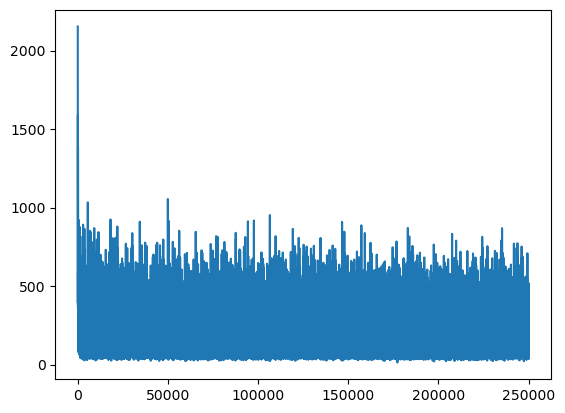

In [80]:
plt.plot(lossi)